# Company Network Connectivity: BoardEx Cleaning & Network Construction

In [1]:
import pandas as pd
import numpy as np
import igraph as ig

In [2]:
boardex = pd.read_csv('boardex.csv')

In [3]:
boardex

,associationtype,companyid,overlapyearstart_int,boardname,companyname,directorname,role,associatedrole,conncompanyorgtype,boardid,directorid,roletitle,roleboardposition,roleedflag,startcompanydatestartrole,overlapyearend_int,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Listed Org,1094770,2004,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Executive Officer (Non-Brd),Independent NED (Brd) (SD),Quoted,3,341621,Executive Officer,Non-Brd,NaN,2002-01-02,2007.0,2007-09-07,2004-04-05,2009-07-28,Quoted
1,Listed Org,13761,1998,1 800 CONTACTS INC (De-listed 09/2007),GRANDVISION (De-listed 03/2004),Edward Butler,Independent Director (Brd) (SD),Chairman (Brd) (SD),Quoted,3,340871,Independent Director,Brd,SD,1998-01-01,1998.0,2007-09-07,1997-01-02,1998-12-31,Quoted
2,Listed Org,28148,2006,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,3,59796,Independent Director,Brd,SD,2005-07-28,2007.0,2007-09-07,2006-08-04,2007-01-31,Quoted
3,Listed Org,40757,2005,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,3,59796,Independent Director,Brd,SD,2005-07-28,2007.0,2007-09-07,2004-05-01,2020-04-23,Quoted
4,Listed Org,16506,2023,1-800-FLOWERS.COM INC,INTERNATIONAL BUSINESS MACHINES (IBM) CORP,Christina Shim,Director - SD (Brd) (SD),VP/Head of Division (Non-Brd),Quoted,6,2779779,Director - SD,Brd,SD,2023-12-14,2024.0,9000-01-01,2021-11-01,2024-05-02,Quoted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008301,Listed Org,2006211,2023,City Therapeutics Inc,KARYOPHARM THERAPEUTICS INC,Professor Barry Greene,Director - SD (Brd) (SD),Lead Independent Director (Brd) (SD),Quoted,3907518,345845,Director - SD,Brd,SD,1900-01-01,NaN,9000-01-01,2015-01-01,9000-01-01,Private
1008302,Listed Org,2360912,2024,City Therapeutics Inc,VOYAGER THERAPEUTICS INC,Doctor Phil Zamore,Scientific Advisor (Non-Brd),Scientific Advisor (Non-Brd),Quoted,3907518,1273575,Scientific Advisor,Non-Brd,NaN,1900-01-01,NaN,9000-01-01,2020-05-01,9000-01-01,Private
1008303,Listed Org,2147864,2024,City Therapeutics Inc,PROQR THERAPEUTICS NV,Doctor Phil Zamore,Scientific Advisor (Non-Brd),Scientific Advisor (Non-Brd),Quoted,3907518,1273575,Scientific Advisor,Non-Brd,NaN,1900-01-01,NaN,9000-01-01,2017-08-28,9000-01-01,Private
1008304,Listed Org,1986196,2024,RuggedEdge Inc,MCLOUD TECHNOLOGIES CORP (Universal mCloud Cor...,Vincent Higgins,CEO (Brd) (ED),Division President (Non-Brd),Quoted,3915440,881021,CEO,Brd,ED,2024-04-01,2024.0,9000-01-01,2022-01-26,2024-05-22,Private


In [4]:
# Rename columns
boardex = boardex.rename(columns={
    'overlapyearstart_int': 'start_year',
    'overlapyearend_int': 'end_year',
    'boardname': 'company1',
    'companyname': 'company2',
    'directorname': 'person',
    'associatedrole': 'company2_role',
    'roleboardposition': 'company1_role',
    'conncompanyorgtype': 'company2_orgtype',
    'orgtype': 'company1_orgtype',
    'boardid': 'company1_id',
    'companyid': 'company2_id'
})

In [5]:
# Only keep if Board or Non-Board
boardex['company2_role'] = boardex['company2_role'].astype(str)

boardex['company2_role'] = np.where(
    boardex['company2_role'].str.contains(r'\(Brd\)', case=False, na=False),
    'Brd',
    'Non-Brd'
)
boardex = boardex[boardex['company1_role'].isin(['Brd', 'Non-Brd'])]

In [6]:
# Drop columns
boardex.drop(columns=['associationtype','roletitle', 'roleedflag', 'role', 'startcompanydatestartrole', 'startcompanydateendrole', 'conncompanydatestartrole', 'conncompanydateendrole'], inplace=True)

In [7]:
# Re-order columns
new_order = ['start_year', 'end_year', 'company1', 'company2', 'person',
             'company1_role', 'company2_role', 'company1_orgtype', 'company2_orgtype',
             'company1_id', 'company2_id']
boardex = boardex[new_order]

In [8]:
boardex.head(5)

,start_year,end_year,company1,company2,person,company1_role,company2_role,company1_orgtype,company2_orgtype,company1_id,company2_id
0,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770
1,1998,1998.0,1 800 CONTACTS INC (De-listed 09/2007),GRANDVISION (De-listed 03/2004),Edward Butler,Brd,Brd,Quoted,Quoted,3,13761
2,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,28148
3,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,40757
4,2023,2024.0,1-800-FLOWERS.COM INC,INTERNATIONAL BUSINESS MACHINES (IBM) CORP,Christina Shim,Brd,Non-Brd,Quoted,Quoted,6,16506


In [9]:
boardex['company1_role'].value_counts()
boardex['company2_role'].value_counts()

company2_role
Brd        658309
Non-Brd    335874
Name: count, dtype: int64

In [10]:
# Drop rows where both company1_role and company2_role equal 'Non-brd'
boardex = boardex[~((boardex['company1_role'] == 'Non-brd') & (boardex['company2_role'] == 'Non-brd'))]

In [11]:
# Drop duplicate rows based on company1, company2, and person columns, keeping the first occurrence
boardex = boardex.drop_duplicates(subset=['company1', 'company2', 'person'], keep='first')

In [12]:
boardex['company1_orgtype'].value_counts()

company1_orgtype
Quoted         542692
Private         81594
Partnership     21603
Government       1725
Charities         430
Clubs              16
Name: count, dtype: int64

In [13]:
# Drop rows where orgtype not quoted
boardex = boardex[~boardex['company1_orgtype'].isin(['Charities', 'Clubs', 'Government', 'Partnership', 'Private'])]

In [15]:
boardex['company1_orgtype'].value_counts()

company1_orgtype
Quoted    542692
Name: count, dtype: int64

In [14]:
boardex['company2_orgtype'].value_counts()

company2_orgtype
Quoted    542692
Name: count, dtype: int64

In [ ]:
boardex_df = boardex

def expand_years(row):
    # If start_year is missing, we cannot expand, so assign None to 'year'
    if pd.isna(row['start_year']):
        new_row = row.copy()
        new_row['year'] = None
        return pd.DataFrame([new_row])

    start_year = int(row['start_year'])

    # If end_year is missing, use 2025; otherwise, convert end_year to int.
    if pd.isna(row['end_year']):
        end_year = 2025
    else:
        end_year = int(row['end_year'])

    # Create a row for each year in the range from start_year to end_year (inclusive)
    new_rows = []
    for year in range(start_year, end_year + 1):
        new_row = row.copy()
        new_row['year'] = year
        new_rows.append(new_row)

    return pd.DataFrame(new_rows)

expanded_df = pd.concat([expand_years(row) for _, row in boardex_df.iterrows()], ignore_index=True)
print(expanded_df.head())

In [21]:
# Save to CSV
expanded_df.to_csv("expanded_df.csv", index=False)

In [31]:
# Import CSV
expanded_df = pd.read_csv('expanded_df.csv')

In [32]:
# Filter out non-quoted companies
expanded_df = expanded_df[expanded_df['company1_orgtype'] == "Quoted"]

In [33]:
expanded_df['year'] = pd.to_datetime(expanded_df['year'], format='%Y-%m-%d').dt.year

In [34]:
expanded_df

,start_year,end_year,company1,company2,person,company1_role,company2_role,company1_orgtype,company2_orgtype,company1_id,company2_id,year
0,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770,2004
1,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770,2005
2,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770,2006
3,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770,2007
4,1998,1998.0,1 800 CONTACTS INC (De-listed 09/2007),GRANDVISION (De-listed 03/2004),Edward Butler,Brd,Brd,Quoted,Quoted,3,13761,1998
...,...,...,...,...,...,...,...,...,...,...,...,...
2705442,2024,NaN,POWER SOLUTIONS INTERNATIONAL INC,EXRO TECHNOLOGIES INC,Frank Simpkins,Brd,Brd,Quoted,Quoted,3906438,2696370,2025
2705443,2024,NaN,POWER SOLUTIONS INTERNATIONAL INC,FERRETTI SPA,Kevin Jiang,Brd,Brd,Quoted,Quoted,3906438,3522838,2024
2705444,2024,NaN,POWER SOLUTIONS INTERNATIONAL INC,FERRETTI SPA,Kevin Jiang,Brd,Brd,Quoted,Quoted,3906438,3522838,2025
2705445,2024,NaN,POWER SOLUTIONS INTERNATIONAL INC,KION GROUP AG,Kevin Jiang,Brd,Brd,Quoted,Quoted,3906438,1967313,2024


In [35]:
link = pd.read_csv('boardex_crsp_comp_link.csv')
crsp = pd.read_csv('crsp.csv')

In [36]:
expanded_linked = expanded_df.merge(link, left_on='company1_id', right_on='companyid', how='inner')

print(expanded_linked.head())

   start_year  end_year                                company1  \
0        2004    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   
1        2004    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   
2        2004    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   
3        2004    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   
4        1998    1998.0  1 800 CONTACTS INC (De-listed 09/2007)   

                                            company2         person  \
0  IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...   Steve Newman   
1  IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...   Steve Newman   
2  IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...   Steve Newman   
3  IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...   Steve Newman   
4                    GRANDVISION (De-listed 03/2004)  Edward Butler   

  company1_role company2_role company1_orgtype company2_orgtype  company1_id  \
0       Non-Brd           Brd           Quoted           Quoted            3   
1       No

In [8]:
total_rows = expanded_df.shape[0]

#count how many rows have a non-null 'companyid' after merging
matched_rows = expanded_linked['companyid'].notnull().sum()
merge_rate = matched_rows / total_rows * 100

print(f"Total rows in connectivity: {total_rows}")
print(f"Matched rows in linking table: {matched_rows}")
print(f"Merge Rate: {merge_rate:.2f}%")

Total rows in connectivity: 2345808
Matched rows in linking table: 2163074
Merge Rate: 92.21%


In [37]:
expanded_linked.rename(columns={'PERMCO': 'PERMCO_company1', 'GVKEY': 'GVKEY_company1', 'score':'score_company1', 'preferred':'preferred_company1', 'duplicate': 'duplicate_company1'}, inplace=True)
expanded_linked.drop(columns={'companyid'}, inplace=True)

In [38]:
expanded_linked

,start_year,end_year,company1,company2,person,company1_role,company2_role,company1_orgtype,company2_orgtype,company1_id,company2_id,year,PERMCO_company1,GVKEY_company1,score_company1,preferred_company1,duplicate_company1
0,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770,2004,15959,66425,1,1,0
1,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770,2005,15959,66425,1,1,0
2,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770,2006,15959,66425,1,1,0
3,2004,2007.0,1 800 CONTACTS INC (De-listed 09/2007),IFS CONSTRUCTION SERVICES LTD (Advanced Ocular...,Steve Newman,Non-Brd,Brd,Quoted,Quoted,3,1094770,2007,15959,66425,1,1,0
4,1998,1998.0,1 800 CONTACTS INC (De-listed 09/2007),GRANDVISION (De-listed 03/2004),Edward Butler,Brd,Brd,Quoted,Quoted,3,13761,1998,15959,66425,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163069,2024,NaN,POWER SOLUTIONS INTERNATIONAL INC,EXRO TECHNOLOGIES INC,Frank Simpkins,Brd,Brd,Quoted,Quoted,3906438,2696370,2025,54418,187169,3,0,1
2163070,2024,NaN,POWER SOLUTIONS INTERNATIONAL INC,FERRETTI SPA,Kevin Jiang,Brd,Brd,Quoted,Quoted,3906438,3522838,2024,54418,187169,3,0,1
2163071,2024,NaN,POWER SOLUTIONS INTERNATIONAL INC,FERRETTI SPA,Kevin Jiang,Brd,Brd,Quoted,Quoted,3906438,3522838,2025,54418,187169,3,0,1
2163072,2024,NaN,POWER SOLUTIONS INTERNATIONAL INC,KION GROUP AG,Kevin Jiang,Brd,Brd,Quoted,Quoted,3906438,1967313,2024,54418,187169,3,0,1


In [39]:
link

,PERMCO,GVKEY,companyid,score,preferred,duplicate
0,5,16671,2917,1,1,0
1,7,1690,2355,1,1,0
2,23,11153,141957,9,1,0
3,24,1402,1764,10,1,0
4,25,1619,2116,2,1,0
...,...,...,...,...,...,...
12268,60102,39881,3891904,1,1,0
12269,60103,271295,1002616,1,1,0
12270,60106,50539,3902994,1,1,0
12271,60112,40235,3481773,1,1,0


In [40]:
expanded_linked2 = expanded_linked.merge(link, left_on='company2_id', right_on='companyid', how='inner')
print(expanded_linked2.head())

   start_year  end_year                                company1  \
0        2006    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   
1        2006    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   
2        2005    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   
3        2005    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   
4        2005    2007.0  1 800 CONTACTS INC (De-listed 09/2007)   

                                 company2     person company1_role  \
0          SITEL CORP (De-listed 01/2007)  Steve Key           Brd   
1          SITEL CORP (De-listed 01/2007)  Steve Key           Brd   
2  GREENHILL & CO INC (De-listed 12/2023)  Steve Key           Brd   
3  GREENHILL & CO INC (De-listed 12/2023)  Steve Key           Brd   
4  GREENHILL & CO INC (De-listed 12/2023)  Steve Key           Brd   

  company2_role company1_orgtype company2_orgtype  company1_id  ...  \
0           Brd           Quoted           Quoted            3  ...   
1           Brd           Quoted  

In [13]:
total_rows = expanded_linked.shape[0]

#count how many rows have a non-null 'companyid' after merging
matched_rows = expanded_linked2['companyid'].notnull().sum()
merge_rate = matched_rows / total_rows * 100

print(f"Total rows in connectivity: {total_rows}")
print(f"Matched rows in linking table: {matched_rows}")
print(f"Merge Rate: {merge_rate:.2f}%")

Total rows in connectivity: 2163074
Matched rows in linking table: 1791021
Merge Rate: 82.80%


In [41]:
expanded_linked2

,start_year,end_year,company1,company2,person,company1_role,company2_role,company1_orgtype,company2_orgtype,company1_id,...,GVKEY_company1,score_company1,preferred_company1,duplicate_company1,PERMCO,GVKEY,companyid,score,preferred,duplicate
0,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,66425,1,1,0,13763,60814,28148,1,1,0
1,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,66425,1,1,0,13763,60814,28148,1,1,0
2,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,66425,1,1,0,45176,264395,40757,1,1,0
3,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,66425,1,1,0,45176,264395,40757,1,1,0
4,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,66425,1,1,0,45176,264395,40757,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791016,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NABORS INDUSTRIES LTD (Nabors Industries prior...,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,31331,1,1,1,20201,1661,21454,1,1,0
1791017,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,CULLEN FROST BANKERS INC,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,31331,1,1,1,840,3643,8414,1,1,0
1791018,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,CULLEN FROST BANKERS INC,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,31331,1,1,1,840,3643,8414,1,1,0
1791019,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NINE ENERGY SERVICE INC,Andy Waite,Brd,Brd,Quoted,Quoted,3906385,...,31331,1,1,1,56220,31507,2764882,1,1,0


In [42]:
expanded_linked2.rename(columns={'PERMCO': 'PERMCO_company2', 'GVKEY': 'GVKEY_company2', 'score':'score_company2', 'preferred':'preferred_company2', 'duplicate': 'duplicate_company2'}, inplace=True)
expanded_linked2.drop(columns={'companyid'}, inplace=True)

In [43]:
expanded_linked2.columns

Index(['start_year', 'end_year', 'company1', 'company2', 'person',
       'company1_role', 'company2_role', 'company1_orgtype',
       'company2_orgtype', 'company1_id', 'company2_id', 'year',
       'PERMCO_company1', 'GVKEY_company1', 'score_company1',
       'preferred_company1', 'duplicate_company1', 'PERMCO_company2',
       'GVKEY_company2', 'score_company2', 'preferred_company2',
       'duplicate_company2'],
      dtype='object')

In [44]:
crsp

,PERMNO,HdrCUSIP,Ticker,PERMCO,SICCD,MthCalDt,MthPrc,MthCap,MthRet,ShrOut
0,10000,68391610,OMFGA,7952,3990,1986-01-31,4.375000,1.610000e+04,0.707317,3680.0
1,10000,68391610,OMFGA,7952,3990,1986-02-28,3.250000,1.196000e+04,-0.257143,3680.0
2,10000,68391610,OMFGA,7952,3990,1986-03-31,4.437500,1.633000e+04,0.365385,3680.0
3,10000,68391610,OMFGA,7952,3990,1986-04-30,4.000000,1.517200e+04,-0.098592,3793.0
4,10000,68391610,OMFGA,7952,3990,1986-05-30,3.109375,1.179386e+04,-0.222656,3793.0
...,...,...,...,...,...,...,...,...,...,...
4613441,93436,88160R10,TSLA,53453,9999,2024-08-30,214.110000,6.840044e+08,-0.077390,3194640.0
4613442,93436,88160R10,TSLA,53453,9999,2024-09-30,261.630000,8.390474e+08,0.221942,3207000.0
4613443,93436,88160R10,TSLA,53453,9999,2024-10-31,249.850000,8.020335e+08,-0.045025,3210060.0
4613444,93436,88160R10,TSLA,53453,9999,2024-11-29,345.160000,1.107984e+09,0.381469,3210060.0


In [45]:
crsp_columns = crsp[['PERMCO', 'SICCD', 'Ticker']].drop_duplicates()

In [46]:
crsp_columns

,PERMCO,SICCD,Ticker
0,7952,3990,OMFGA
17,7952,0,NaN
18,7953,4920,GFGC
112,7953,4920,EWST
303,7953,4920,EGAS
...,...,...,...
4613071,53451,0,NaN
4613072,53427,9999,SANW
4613247,53452,6163,SCEI
4613270,53452,0,NaN


In [47]:
expanded_crsp = expanded_linked2.merge(crsp_columns, left_on='PERMCO_company1', right_on='PERMCO', how='left')

In [48]:
expanded_crsp.rename(columns={'PERMCO':'PERMCO_company1', 'SICCD':'SICCD_company1', 'Ticker':'ticker_company1'}, inplace=True)

In [49]:
expanded_crsp2 = expanded_crsp.merge(crsp_columns, left_on='PERMCO_company2', right_on='PERMCO', how='left')

In [50]:
expanded_crsp2.rename(columns={'PERMCO':'PERMCO_company2', 'SICCD':'SICCD_company2', 'Ticker':'ticker_company2'}, inplace=True)

In [51]:
expanded_crsp2

,start_year,end_year,company1,company2,person,company1_role,company2_role,company1_orgtype,company2_orgtype,company1_id,...,GVKEY_company2,score_company2,preferred_company2,duplicate_company2,PERMCO_company1,SICCD_company1,Ticker_x,PERMCO_company2,SICCD_company2,Ticker_y
0,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,7380.0,SITL
1,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,7389.0,SWW
2,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,0.0,NaN
3,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5961.0,CTAC,13763.0,7380.0,SITL
4,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5961.0,CTAC,13763.0,7389.0,SWW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763327,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NINE ENERGY SERVICE INC,Andy Waite,Brd,Brd,Quoted,Quoted,3906385,...,31507,1,1,0,55939.0,9999.0,NaN,56220.0,1389.0,NINE
12763328,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NINE ENERGY SERVICE INC,Andy Waite,Brd,Brd,Quoted,Quoted,3906385,...,31507,1,1,0,55939.0,9999.0,NESR,56220.0,5211.0,NINE
12763329,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NINE ENERGY SERVICE INC,Andy Waite,Brd,Brd,Quoted,Quoted,3906385,...,31507,1,1,0,55939.0,9999.0,NESR,56220.0,1389.0,NINE
12763330,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NINE ENERGY SERVICE INC,Andy Waite,Brd,Brd,Quoted,Quoted,3906385,...,31507,1,1,0,55939.0,9999.0,NaN,56220.0,5211.0,NINE


In [52]:
expanded_crsp2 = expanded_crsp2.drop_duplicates(subset=['year', 'company1', 'company2'])

In [53]:
expanded_crsp2

,start_year,end_year,company1,company2,person,company1_role,company2_role,company1_orgtype,company2_orgtype,company1_id,...,GVKEY_company2,score_company2,preferred_company2,duplicate_company2,PERMCO_company1,SICCD_company1,Ticker_x,PERMCO_company2,SICCD_company2,Ticker_y
0,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,7380.0,SITL
9,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,7380.0,SITL
18,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
27,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
36,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763306,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NABORS INDUSTRIES LTD (Nabors Industries prior...,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,1661,1,1,0,55939.0,9999.0,NESR,20201.0,2819.0,AGO
12763312,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,CULLEN FROST BANKERS INC,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,3643,1,1,0,55939.0,9999.0,NESR,840.0,6711.0,CFBI
12763318,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,CULLEN FROST BANKERS INC,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,3643,1,1,0,55939.0,9999.0,NESR,840.0,6711.0,CFBI
12763324,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NINE ENERGY SERVICE INC,Andy Waite,Brd,Brd,Quoted,Quoted,3906385,...,31507,1,1,0,55939.0,9999.0,NESR,56220.0,5211.0,NINE


In [54]:
filtered_crsp = expanded_crsp2[~(expanded_crsp2['SICCD_company1'].astype(str).str.startswith('67') | 
                                 expanded_crsp2['SICCD_company2'].astype(str).str.startswith('67'))]


In [55]:
filtered_crsp

,start_year,end_year,company1,company2,person,company1_role,company2_role,company1_orgtype,company2_orgtype,company1_id,...,GVKEY_company2,score_company2,preferred_company2,duplicate_company2,PERMCO_company1,SICCD_company1,Ticker_x,PERMCO_company2,SICCD_company2,Ticker_y
0,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,7380.0,SITL
9,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,7380.0,SITL
18,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
27,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
36,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763288,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,LYONDELLBASELL INDUSTRIES NV,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,294524,3,1,0,55939.0,9999.0,NESR,53531.0,2821.0,LYB
12763300,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NABORS INDUSTRIES LTD (Nabors Industries prior...,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,1661,1,1,0,55939.0,9999.0,NESR,20201.0,2819.0,AGO
12763306,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NABORS INDUSTRIES LTD (Nabors Industries prior...,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,1661,1,1,0,55939.0,9999.0,NESR,20201.0,2819.0,AGO
12763324,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NINE ENERGY SERVICE INC,Andy Waite,Brd,Brd,Quoted,Quoted,3906385,...,31507,1,1,0,55939.0,9999.0,NESR,56220.0,5211.0,NINE


In [62]:
# Drop rows where both company1_role and company2_role equal 'Non-brd'
filtered_crsp = filtered_crsp[~((filtered_crsp['company1_role'] == 'Non-Brd') & (filtered_crsp['company2_role'] == 'Non-Brd'))]

In [63]:
filtered_crsp

,start_year,end_year,company1,company2,person,company1_role,company2_role,company1_orgtype,company2_orgtype,company1_id,...,GVKEY_company2,score_company2,preferred_company2,duplicate_company2,PERMCO_company1,SICCD_company1,Ticker_x,PERMCO_company2,SICCD_company2,Ticker_y
0,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,7380.0,SITL
9,2006,2007.0,1 800 CONTACTS INC (De-listed 09/2007),SITEL CORP (De-listed 01/2007),Steve Key,Brd,Brd,Quoted,Quoted,3,...,60814,1,1,0,15959.0,5960.0,CTAC,13763.0,7380.0,SITL
18,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
27,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
36,2005,2007.0,1 800 CONTACTS INC (De-listed 09/2007),GREENHILL & CO INC (De-listed 12/2023),Steve Key,Brd,Brd,Quoted,Quoted,3,...,264395,1,1,0,15959.0,5960.0,CTAC,45176.0,6211.0,GHL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763288,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,LYONDELLBASELL INDUSTRIES NV,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,294524,3,1,0,55939.0,9999.0,NESR,53531.0,2821.0,LYB
12763300,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NABORS INDUSTRIES LTD (Nabors Industries prior...,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,1661,1,1,0,55939.0,9999.0,NESR,20201.0,2819.0,AGO
12763306,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NABORS INDUSTRIES LTD (Nabors Industries prior...,Tony Chase,Brd,Brd,Quoted,Quoted,3906385,...,1661,1,1,0,55939.0,9999.0,NESR,20201.0,2819.0,AGO
12763324,2024,NaN,NATIONAL ENERGY SERVICES REUNITED CORP,NINE ENERGY SERVICE INC,Andy Waite,Brd,Brd,Quoted,Quoted,3906385,...,31507,1,1,0,55939.0,9999.0,NESR,56220.0,5211.0,NINE


In [64]:
filtered_crsp.to_csv('filtered_crsp.csv', index=False)

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Group the DataFrame by 'year'
results_list = []

for yr, df_year in filtered_crsp.groupby('year'):
    # Ensure company IDs are strings to avoid ordering issues
    df_year['company1_id'] = df_year['company1_id'].astype(str)
    df_year['company2_id'] = df_year['company2_id'].astype(str)
    
    # Get unique company IDs
    companies = sorted(pd.concat([df_year['company1_id'], df_year['company2_id']]).unique())
    mapping = {company: idx for idx, company in enumerate(companies)}

    # Create sorted pairs
    comp1 = df_year['company1_id'].values
    comp2 = df_year['company2_id'].values
    u = np.minimum(comp1, comp2)
    v = np.maximum(comp1, comp2)
    pairs = list(zip(u, v))

    # Compute edge weights
    edge_weights = pd.Series(pairs).value_counts().to_dict()

    # Create an igraph Graph
    g = ig.Graph()
    g.add_vertices(companies)

    # Add edges
    edges = [(mapping[u], mapping[v]) for (u, v), w in edge_weights.items()]
    weights = [w for (u, v), w in edge_weights.items()]
    g.add_edges(edges)
    g.es['weight'] = weights

    # Compute centrality measures
    inv_weights = [1.0 / w if w > 0 else 0 for w in weights]
    betweenness = g.betweenness(weights=inv_weights)
    closeness = g.closeness(weights="weight")
    n = g.vcount()
    degree_counts = g.degree()
    degree = [d / (n - 1) if n > 1 else 0 for d in degree_counts]

    try:
        eigenvector = g.eigenvector_centrality(weights="weight", scale=True)
    except Exception:
        eigenvector = [None] * n

    # Create DataFrame
    df_metrics = pd.DataFrame({
        'company_linking': g.vs['name'],
        'year': yr,
        'betweenness': betweenness,
        'closeness': closeness,
        'degree': degree,
        'eigenvector': eigenvector
    })

    # Normalize all centrality measures (Min-Max Scaling)
    scaler = MinMaxScaler()
    df_metrics[['betweenness', 'closeness', 'degree', 'eigenvector']] = scaler.fit_transform(
        df_metrics[['betweenness', 'closeness', 'degree', 'eigenvector']]
    )

    results_list.append(df_metrics)

# Combine results into a single DataFrame
metrics_df = pd.concat(results_list, ignore_index=True)
print(metrics_df)


       company_linking  year  betweenness  closeness    degree   eigenvector
0                11608  1968     0.000000   0.000000  0.000000  1.000000e+00
1                16506  1968     0.000000   0.000000  0.000000  1.000000e+00
2                21015  1968     0.000000   1.000000  0.000000  5.334246e-17
3                21515  1968     0.000000   1.000000  0.000000  0.000000e+00
4                 2366  1968     0.000000   0.000000  0.000000  9.999852e-01
...                ...   ...          ...        ...       ...           ...
118758            9831  2025     0.000000   0.056709  0.022222  5.905482e-03
118759            9834  2025     0.000035   0.073471  0.022222  1.935864e-02
118760            9931  2025     0.001887   0.045431  0.044444  1.955908e-03
118761            9940  2025     0.080838   0.095844  0.244444  1.407078e-01
118762            9989  2025     0.064493   0.095457  0.200000  3.378508e-01

[118763 rows x 6 columns]


In [66]:
metrics_df.to_csv("raw_metrics_feb26.csv", index=False)

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Group the DataFrame by 'year'
results_list = []

for yr, df_year in filtered_crsp.groupby('year'):
    # Ensure company IDs are strings
    df_year['company1_id'] = df_year['company1_id'].astype(str)
    df_year['company2_id'] = df_year['company2_id'].astype(str)
    
    # Get unique company IDs
    companies = sorted(pd.concat([df_year['company1_id'], df_year['company2_id']]).unique())
    mapping = {company: idx for idx, company in enumerate(companies)}

    # Create sorted pairs
    comp1 = df_year['company1_id'].values
    comp2 = df_year['company2_id'].values
    u = np.minimum(comp1, comp2)
    v = np.maximum(comp1, comp2)
    pairs = list(zip(u, v))

    # Compute edge weights
    edge_weights = pd.Series(pairs).value_counts().to_dict()

    # Create an igraph Graph
    g = ig.Graph()
    g.add_vertices(companies)

    # Add edges
    edges = [(mapping[u], mapping[v]) for (u, v), w in edge_weights.items()]
    weights = [w for (u, v), w in edge_weights.items()]
    g.add_edges(edges)
    g.es['weight'] = weights

    # Compute centrality measures
    inv_weights = [1.0 / w if w > 0 else 0 for w in weights]
    betweenness = g.betweenness(weights=inv_weights)
    closeness = g.closeness(weights="weight")  # Unnormalized, needs scaling
    n = g.vcount()
    degree_counts = g.degree()
    degree = [d / (n - 1) if n > 1 else 0 for d in degree_counts]  # Already normalized

    try:
        eigenvector = g.eigenvector_centrality(weights="weight", scale=True)  # Already normalized
    except Exception:
        eigenvector = [None] * n

    # Create DataFrame
    df_metrics = pd.DataFrame({
        'company_linking': g.vs['name'],
        'year': yr,
        'betweenness': betweenness,
        'closeness': closeness,
        'degree': degree,  # Already normalized, no need to transform
        'eigenvector': eigenvector  # Already normalized by igraph
    })

    # Normalize only betweenness and closeness centrality
    scaler = MinMaxScaler()
    df_metrics[['betweenness', 'closeness']] = scaler.fit_transform(df_metrics[['betweenness', 'closeness']])

    results_list.append(df_metrics)

# Combine results into a single DataFrame
metrics_df = pd.concat(results_list, ignore_index=True)
print(metrics_df)


       company_linking  year  betweenness  closeness    degree  eigenvector
0                11608  1968     0.000000   0.000000  0.142857     1.000000
1                16506  1968     0.000000   0.000000  0.142857     1.000000
2                21015  1968     0.000000   1.000000  0.142857     0.000000
3                21515  1968     0.000000   1.000000  0.142857     0.000000
4                 2366  1968     0.000000   0.000000  0.142857     0.999972
...                ...   ...          ...        ...       ...          ...
118758            9831  2025     0.000000   0.056709  0.000583     0.005905
118759            9834  2025     0.000035   0.073471  0.000583     0.019359
118760            9931  2025     0.001887   0.045431  0.000874     0.001956
118761            9940  2025     0.080838   0.095844  0.003498     0.140708
118762            9989  2025     0.064493   0.095457  0.002915     0.337851

[118763 rows x 6 columns]


In [74]:
zero_degree_nodes = [g.vs[idx]["name"] for idx, d in enumerate(g.degree()) if d == 0]
print("Companies with degree 0:", zero_degree_nodes)

zero_betweenness_nodes = [g.vs[idx]["name"] for idx, d in enumerate(g.betweenness()) if d == 0]
print("Companies with betweenness 0:", zero_degree_nodes)

zero_closeness_nodes = [g.vs[idx]["name"] for idx, d in enumerate(g.closeness()) if d == 0]
print("Companies with closeness 0:", zero_degree_nodes)

zero_eigenvector_nodes = [g.vs[idx]["name"] for idx, d in enumerate(g.eigenvector()) if d == 0]
print("Companies with eigenvector 0:", zero_degree_nodes)

Companies with degree 0: []
Companies with betweenness 0: []
Companies with closeness 0: []


AttributeError: 'Graph' object has no attribute 'eigenvector'

In [68]:
metrics_df.to_csv("normalized_metrics_feb26.csv", index=False)

In [70]:
metrics_df

,company_linking,year,betweenness,closeness,degree,eigenvector
0,11608,1968,0.000000,0.000000,0.142857,1.000000
1,16506,1968,0.000000,0.000000,0.142857,1.000000
2,21015,1968,0.000000,1.000000,0.142857,0.000000
3,21515,1968,0.000000,1.000000,0.142857,0.000000
4,2366,1968,0.000000,0.000000,0.142857,0.999972
...,...,...,...,...,...,...
118758,9831,2025,0.000000,0.056709,0.000583,0.005905
118759,9834,2025,0.000035,0.073471,0.000583,0.019359
118760,9931,2025,0.001887,0.045431,0.000874,0.001956
118761,9940,2025,0.080838,0.095844,0.003498,0.140708


Summary Statistics:
       betweenness  closeness     degree  eigenvector
count   118,763.00 118,763.00 118,763.00   118,763.00
mean          0.03       0.11       0.00         0.04
std           0.07       0.15       0.00         0.09
min           0.00       0.00       0.00         0.00
25%           0.00       0.05       0.00         0.00
50%           0.01       0.07       0.00         0.01
75%           0.03       0.08       0.00         0.04
max           1.00       1.00       0.14         1.00


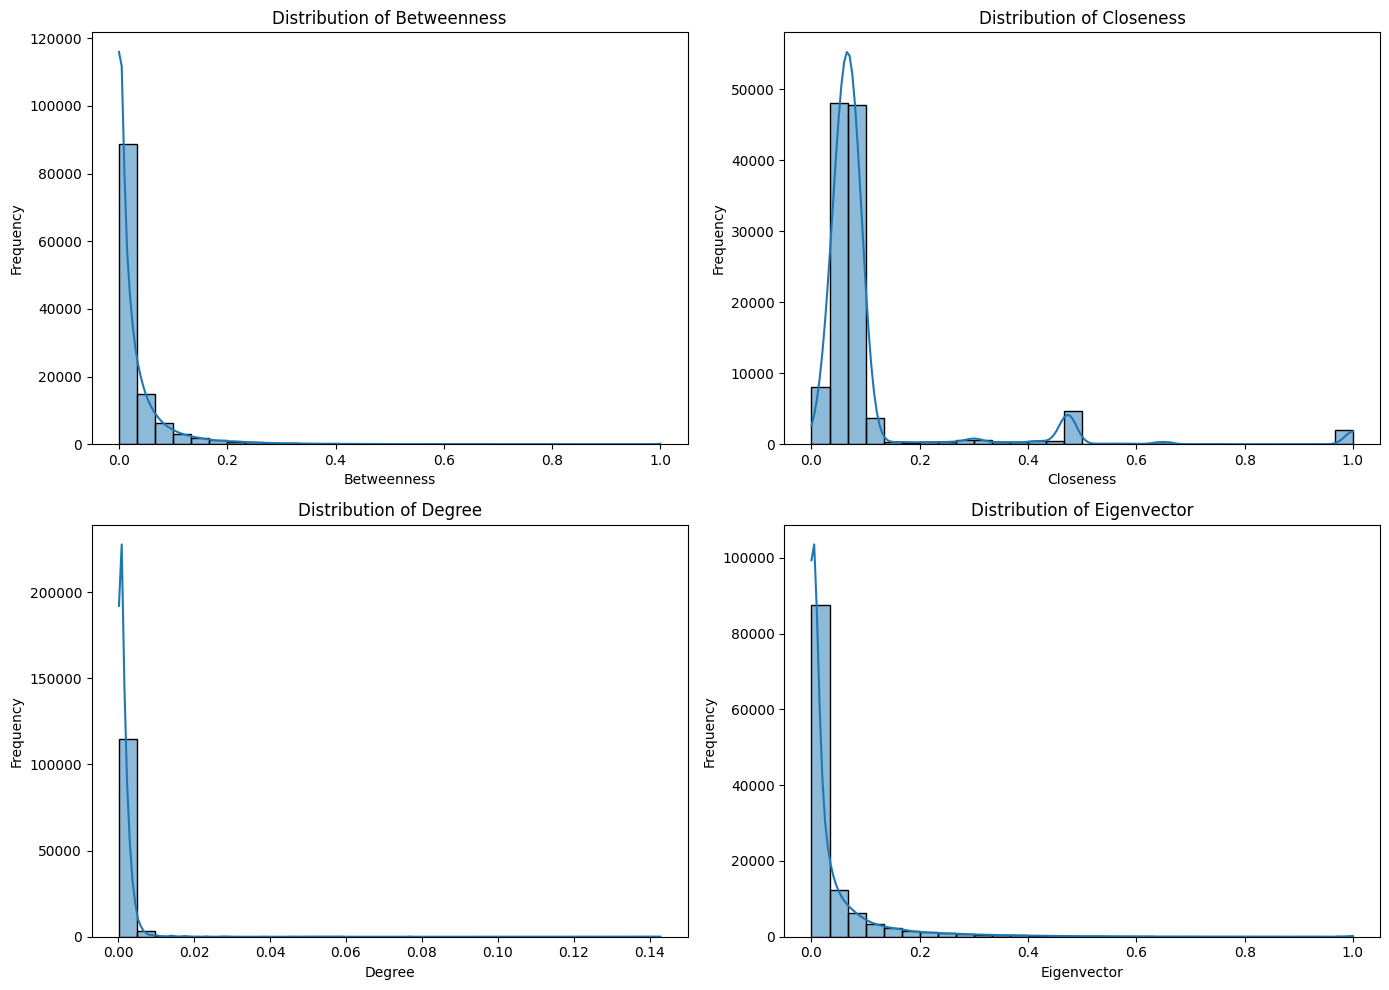

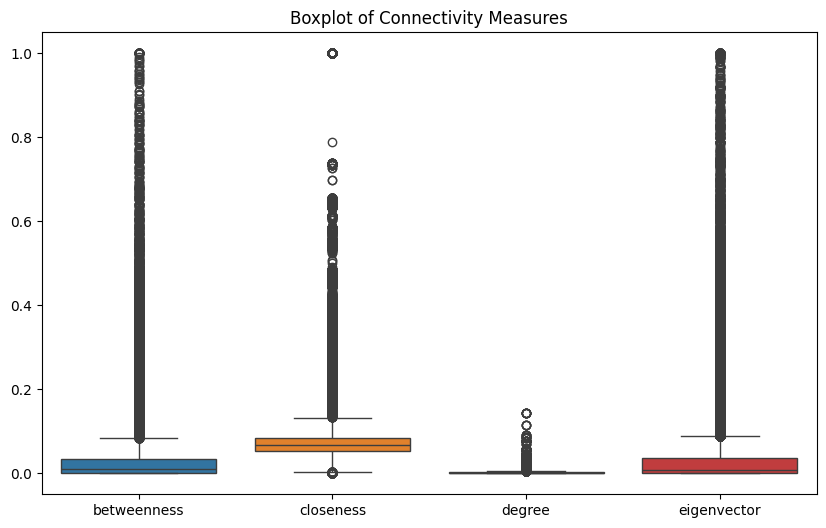

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)

# Display summary statistics for the connectivity measures
print("Summary Statistics:")
print(metrics_df[['betweenness', 'closeness', 'degree', 'eigenvector']].describe())

# Plot histograms with KDE for each connectivity measure
plt.figure(figsize=(14, 10))
centrality_measures = ['betweenness', 'closeness', 'degree', 'eigenvector']

for i, col in enumerate(centrality_measures, 1):
    plt.subplot(2, 2, i)
    sns.histplot(metrics_df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot a boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=metrics_df[centrality_measures])
plt.title("Boxplot of Connectivity Measures")
plt.show()